# Geodesics on Learned Manifolds

In [1]:
#Modules
import jax.numpy as jnp
import jax.random as jrandom
from jax import vmap

import haiku as hk

import torchvision.utils as vutils

#numpy
import numpy as np

from abc import ABC

import torch

import matplotlib.pyplot as plt

from geodesics import GradientDescent, JAXOptimization, ScipyOptimization, GC_LineSearch

from vae.model_loader import mnist_generator, svhn_generator, celeba_generator, load_model

from vae.models.eval.mnist import Encoder as mnist_encoder
from vae.models.eval.mnist import Decoder as mnist_decoder
from vae.models.eval.mnist import VAE as mnist_vae

from vae.models.eval.svhn import Encoder as svhn_encoder
from vae.models.eval.svhn import Decoder as svhn_decoder
from vae.models.eval.svhn import VAE as svhn_vae

from vae.models.eval.celeba import Encoder as celeba_encoder
from vae.models.eval.celeba import Decoder as celeba_decoder
from vae.models.eval.celeba import VAE as celeba_vae

2024-05-31 10:59:23.149721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
seed = 2712
model_path = 'models/'

## VAE MNIST

### Loading Data

In [3]:
mnist_dataloader = mnist_generator(seed=seed)[0]

2024-05-31 10:59:24.723039: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Loading Model

In [9]:
@hk.transform
def mnist_tvae(x):


    vae = mnist_vae(
                encoder=mnist_encoder(latent_dim=8),
                decoder=mnist_decoder(),
    )

    return vae(x)

@hk.transform
def mnist_tencoder(x):


    encoder = mnist_encoder(latent_dim=16)

    return encoder(x)

@hk.transform
def mnist_tdecoder(x):

    decoder = mnist_decoder(latent_dim=16)

    return decoder(x)

In [10]:
mnist_state = load_model(''.join((model_path, 'mnist/')))

In [11]:
mnist_encoder_fun = lambda x: mnist_tencoder.apply(mnist_state.params, mnist_state.rng_key, x)
mnist_decoder_fun = lambda x: mnist_tdecoder.apply(mnist_state.params, mnist_state.rng_key, x)
mnist_vae_fun = lambda x: mnist_tvae.apply(mnist_state.params, mnist_state.rng_key, x)

### Plotting Reconstruction

In [12]:
mnist_data = jnp.array(next(iter(mnist_dataloader.batch(64))))

In [13]:
mnist_rec = mnist_vae_fun(mnist_data)

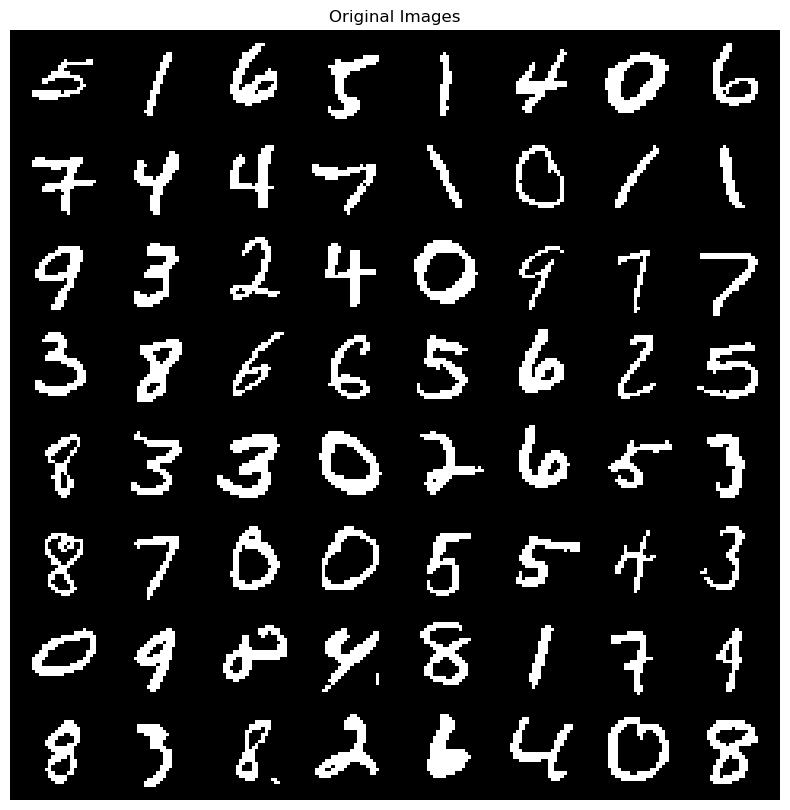

In [14]:
plot_val = torch.from_numpy(np.transpose(np.array(mnist_data), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

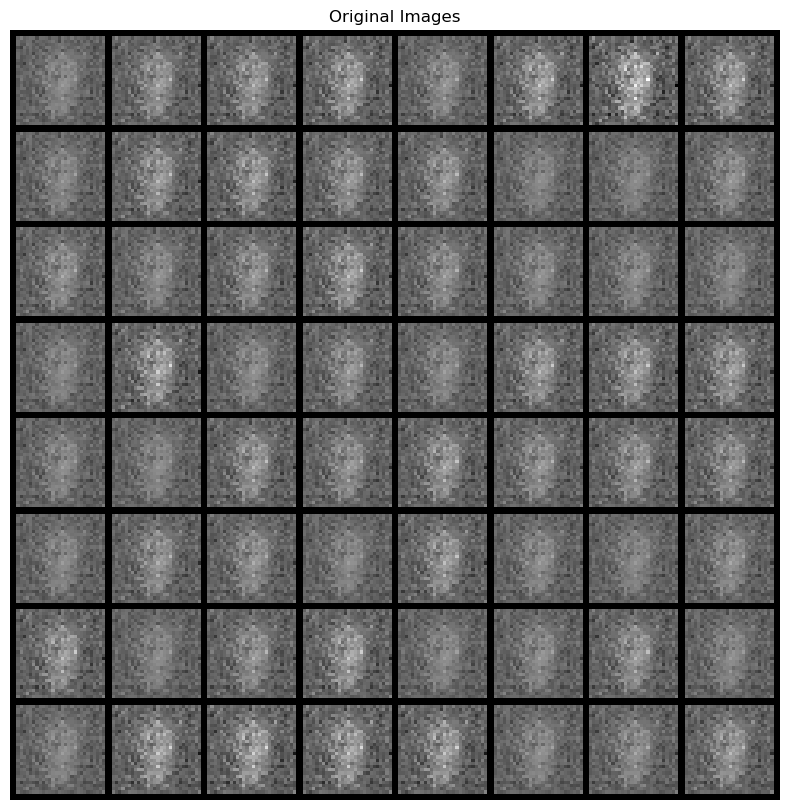

In [15]:
plot_val = torch.from_numpy(np.transpose(np.array(mnist_rec.mu_xz), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

## VAE SVHN

### Loading Data

In [9]:
svhn_dataloader = svhn_generator(data_dir = "../../../Data/SVHN/",
                                  train_frac=0.8,
                                  seed=seed)[0]

### Loading Model

In [10]:
@hk.transform
def svhn_tvae(x):


    vae = svhn_vae(
                encoder=svhn_encoder(latent_dim=32),
                decoder=svhn_decoder(),
    )

    return vae(x)

@hk.transform
def svhn_tencoder(x):


    encoder = svhn_encoder(latent_dim=32)

    return encoder(x)

@hk.transform
def svhn_tdecoder(x):

    decoder = svhn_decoder(latent_dim=32)

    return decoder(x)

In [11]:
svhn_state = load_model(''.join((model_path, 'svhn/')))

In [12]:
svhn_encoder_fun = lambda x: svhn_tencoder.apply(svhn_state.params, svhn_state.rng_key, x)
svhn_decoder_fun = lambda x: svhn_tdecoder.apply(svhn_state.params, svhn_state.rng_key, x)
svhn_vae_fun = lambda x: svhn_tvae.apply(svhn_state.params, svhn_state.rng_key, x)

### Plotting Reconstruction

In [13]:
svhn_data = jnp.array(next(iter(svhn_dataloader.batch(64))))

In [14]:
svhn_rec = svhn_vae_fun(svhn_data)

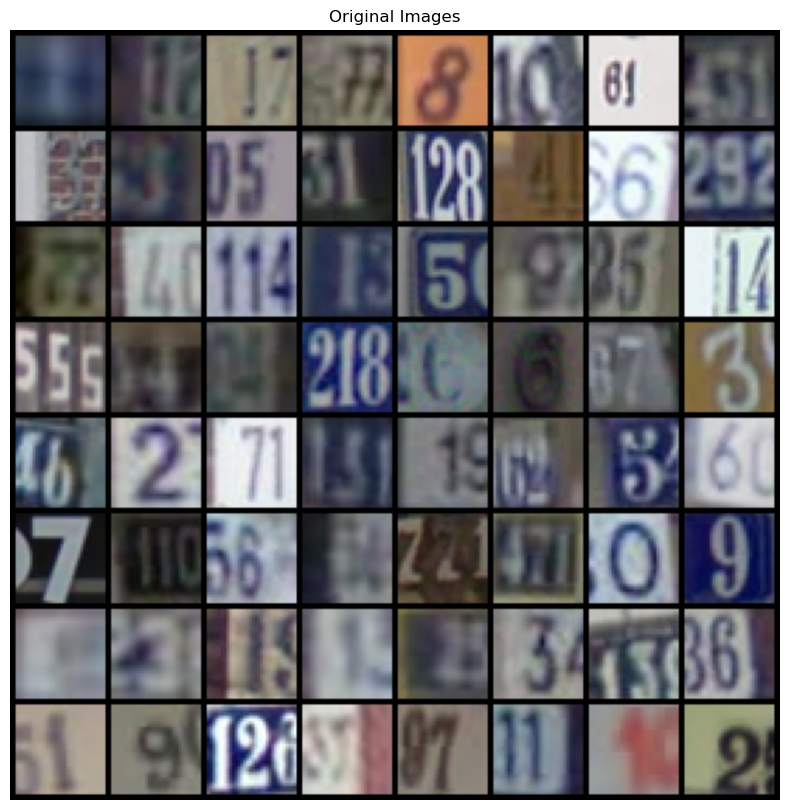

In [15]:
plot_val = torch.from_numpy(np.transpose(np.array(svhn_data), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

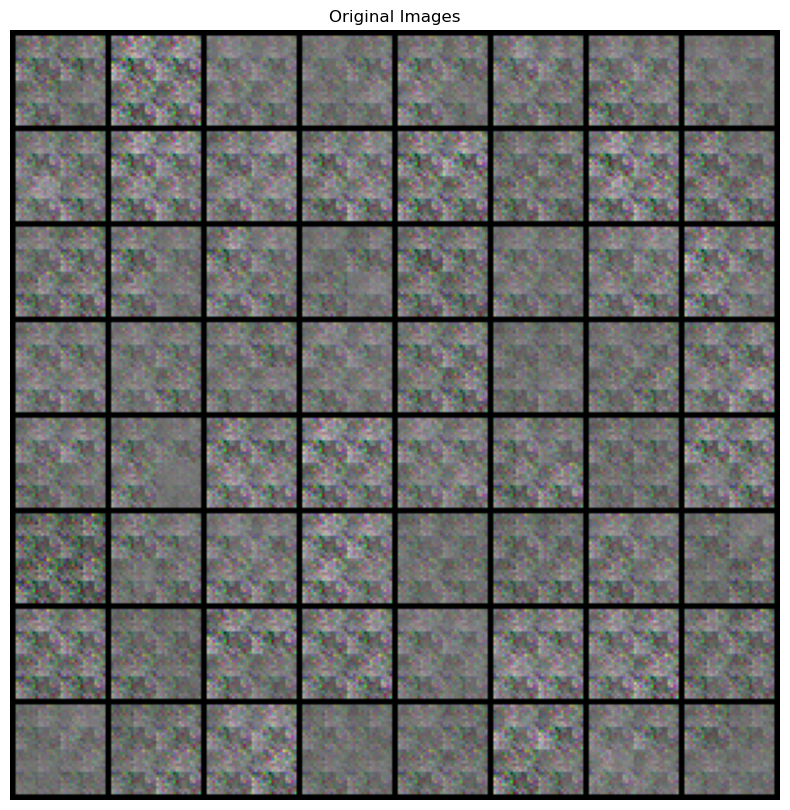

In [16]:
plot_val = torch.from_numpy(np.transpose(np.array(svhn_rec.mu_xz), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

## VAE CelebA

### Loading Data

In [17]:
celeba_dataloader = celeba_generator(data_dir = "../../../Data/CelebA/",
                                      train_frac=0.8,
                                      seed=seed)[0]

Found 202599 files belonging to 1 classes.
Using 162080 files for training.
Found 202599 files belonging to 1 classes.
Using 40519 files for validation.


### Loading Model

In [18]:
@hk.transform
def celeba_tvae(x):


    vae = celeba_vae(
                encoder=celeba_encoder(latent_dim=32),
                decoder=celeba_decoder(),
    )

    return vae(x)

@hk.transform
def celeba_tencoder(x):


    encoder = celeba_encoder(latent_dim=32)

    return encoder(x)

@hk.transform
def celeba_tdecoder(x):

    decoder = celeba_decoder(latent_dim=32)

    return decoder(x)

In [19]:
celeba_state = load_model(''.join((model_path, 'celeba/')))

In [20]:
celeba_encoder_fun = lambda x: celeba_tencoder.apply(celeba_state.params, celeba_state.rng_key, x)
celeba_decoder_fun = lambda x: celeba_tdecoder.apply(celeba_state.params, celeba_state.rng_key, x)
celeba_vae_fun = lambda x: celeba_tvae.apply(celeba_state.params, celeba_state.rng_key, x)

### Plotting Reconstruction

In [21]:
celeba_data = jnp.array(next(iter(celeba_dataloader.batch(64)))).squeeze()

In [22]:
celeba_rec = celeba_vae_fun(celeba_data)

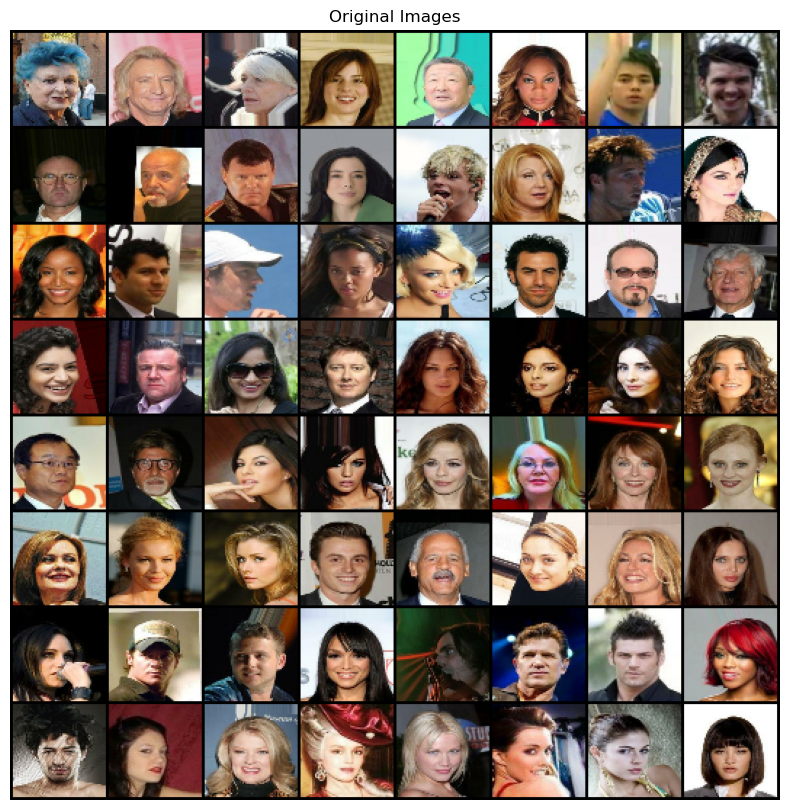

In [23]:
plot_val = torch.from_numpy(np.transpose(np.array(celeba_data), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

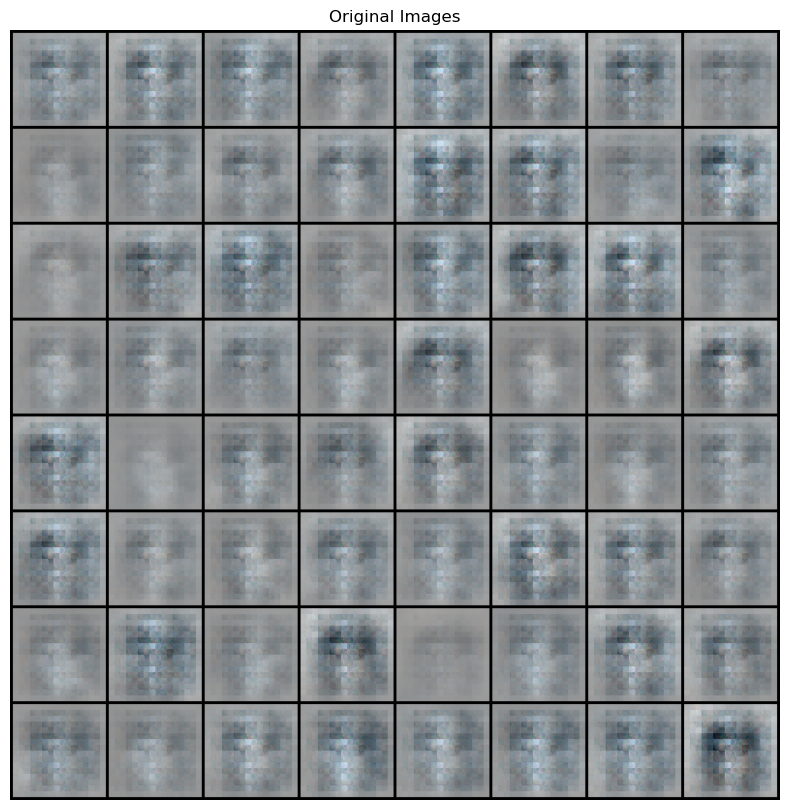

In [24]:
plot_val = torch.from_numpy(np.transpose(np.array(celeba_rec.mu_xz), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))